In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("data_cs/train.pkl", "rb") as file1:
    train_data = pickle.load(file1)
train_data

[{'prompt': 'Translate the following text from English to Spanish\n\n### English:\nBank card details\n\n### Spanish:\n',
  'translation': 'Detalles de tarjetas bancarias'},
 {'prompt': 'Translate the following text from English to Russian\n\n### English:\nBank card details\n\n### Russian:\n',
  'translation': 'Данные банковских карт'},
 {'prompt': 'Translate the following text from Spanish to English\n\n### Spanish:\nDetalles de tarjetas bancarias\n\n### English:\n',
  'translation': 'Bank card details'},
 {'prompt': 'Translate the following text from Spanish to Russian\n\n### Spanish:\nDetalles de tarjetas bancarias\n\n### Russian:\n',
  'translation': 'Данные банковских карт'},
 {'prompt': 'Translate the following text from Russian to English\n\n### Russian:\nДанные банковских карт\n\n### English:\n',
  'translation': 'Bank card details'},
 {'prompt': 'Translate the following text from Russian to Spanish\n\n### Russian:\nДанные банковских карт\n\n### Spanish:\n',
  'translation': 'De

In [3]:
with open("data_cs/test.pkl", "rb") as file2:
    test_data = pickle.load(file2)
test_data

[{'prompt': 'Translate the following text from English to Spanish\n\n### English:\n2. On the Threats tab, in the Categories of objects to detect section, select the checkboxes next to the categories of objects to detect.\n\n### Spanish:\n',
  'translation': '2. En la pestaña Amenazas, en la sección Categorías de los objetos detectados, seleccione las casillas que se encuentran junto a las categorías de objetos que se deben detectar.'},
 {'prompt': 'Translate the following text from English to Russian\n\n### English:\n2. On the Threats tab, in the Categories of objects to detect section, select the checkboxes next to the categories of objects to detect.\n\n### Russian:\n',
  'translation': '2. На закладке Угрозы в блоке Категории обнаруживаемых объектов установите флажки рядом с категориями объектов, которые программа должна обнаруживать.'},
 {'prompt': 'Translate the following text from Spanish to English\n\n### Spanish:\n2. En la pestaña Amenazas, en la sección Categorías de los objet

In [4]:
train_df = pd.DataFrame(train_data)
train_df

,prompt,translation
0,Translate the following text from English to S...,Detalles de tarjetas bancarias
1,Translate the following text from English to R...,Данные банковских карт
2,Translate the following text from Spanish to E...,Bank card details
3,Translate the following text from Spanish to R...,Данные банковских карт
4,Translate the following text from Russian to E...,Bank card details
...,...,...
4735,Translate the following text from English to R...,Для этого злоумышленники выполняют прямые атак...
4736,Translate the following text from Spanish to E...,"To achieve these goals, criminals either carry..."
4737,Translate the following text from Spanish to R...,Для этого злоумышленники выполняют прямые атак...
4738,Translate the following text from Russian to E...,"To achieve these goals, criminals either carry..."


In [5]:
test_df = pd.DataFrame(test_data)
test_df

,prompt,translation
0,Translate the following text from English to S...,"2. En la pestaña Amenazas, en la sección Categ..."
1,Translate the following text from English to R...,2. На закладке Угрозы в блоке Категории обнару...
2,Translate the following text from Spanish to E...,"2. On the Threats tab, in the Categories of ob..."
3,Translate the following text from Spanish to R...,2. На закладке Угрозы в блоке Категории обнару...
4,Translate the following text from Russian to E...,"2. On the Threats tab, in the Categories of ob..."
...,...,...
1183,Translate the following text from English to R...,Настоящий документ носит информационный и спра...
1184,Translate the following text from Spanish to E...,This document is intended for information and ...
1185,Translate the following text from Spanish to R...,Настоящий документ носит информационный и спра...
1186,Translate the following text from Russian to E...,This document is intended for information and ...


In [6]:
train_df.translation.describe()

count                4740
unique               2357
top       Origins Tracing
freq                    6
Name: translation, dtype: object

In [7]:
test_df.translation.describe()

count                                                  1188
unique                                                  594
top       2. En la pestaña Amenazas, en la sección Categ...
freq                                                      2
Name: translation, dtype: object

# Подсчет количества символов

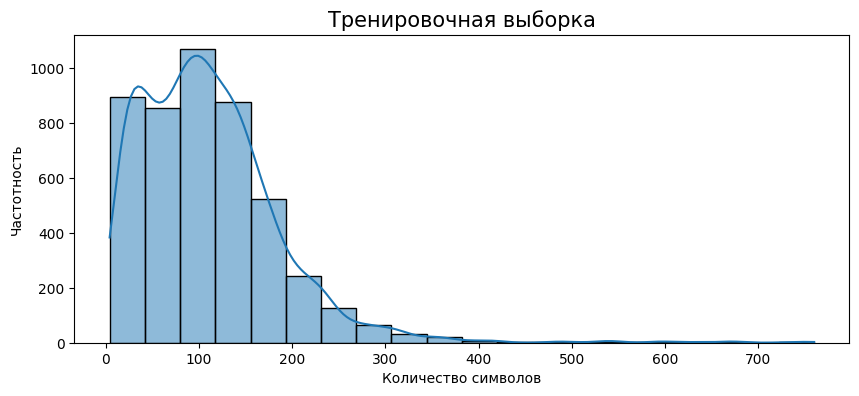

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(
    data=train_df.translation.str.len(),
    bins=20,
    kde=True
)
ax.set(xlabel='Количество символов', ylabel='Частотность')
ax.set_title(
    "Тренировочная выборка",
    size=15
)
plt.show()

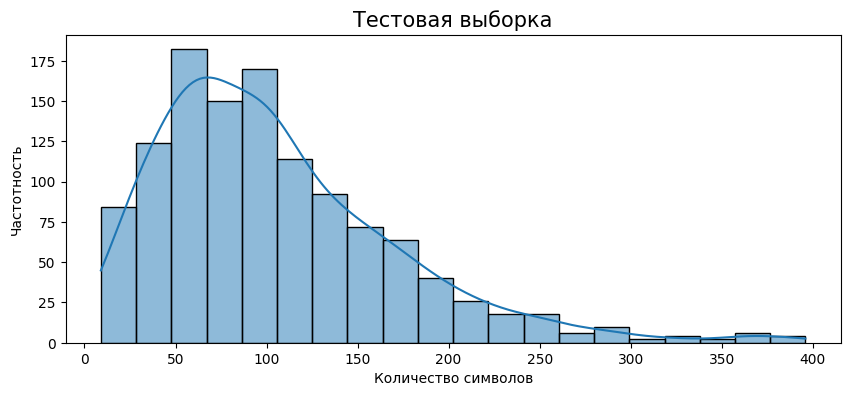

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(
    data=test_df.translation.str.len(),
    bins=20,
    kde=True
)
ax.set(xlabel='Количество символов', ylabel='Частотность')
ax.set_title(
    "Тестовая выборка",
    size=15
)
plt.show()

**Вывод**: В тренировочной выборке встречаются предложения длиной до 750 символов, в тестовой -- до 400. Чаще всего в тренировочной выборке длина предложения составляет 80-150 символов. В тестовой -- 50-80.

# Подсчёт количества слов

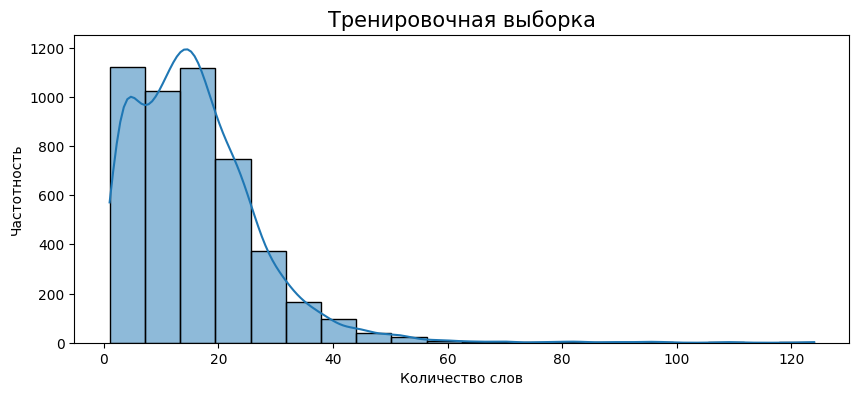

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(
    data=train_df.translation.str.split().map(lambda x: len(x)),
    bins=20,
    kde=True
)
ax.set(xlabel='Количество слов', ylabel='Частотность')
ax.set_title(
    "Тренировочная выборка",
    size=15
)
plt.show()

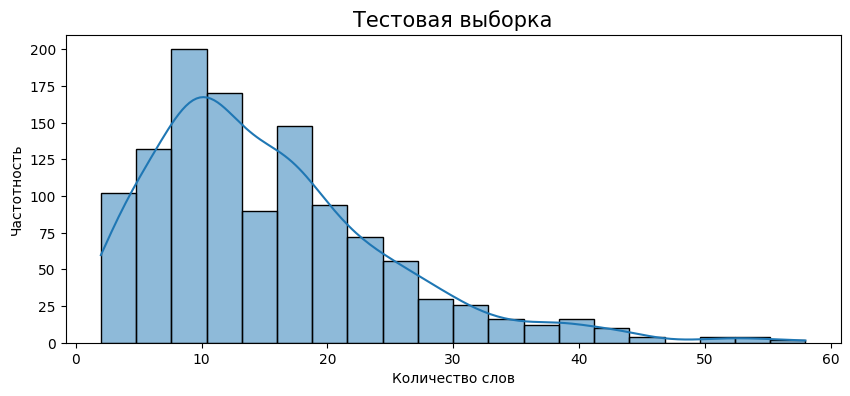

In [15]:
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(
    data=test_df.translation.str.split().map(lambda x: len(x)),
    bins=20,
    kde=True
)
ax.set(xlabel='Количество слов', ylabel='Частотность')
ax.set_title(
    "Тестовая выборка",
    size=15
)
plt.show()

**Вывод**: В тренировочной выборке встречаются предложения длиной чуть больше 120 слов, в тестовой -- до 60. Чаще всего в тренировочной выборке длина предложения составляет до 30 слов. В тестовой -- аналогично, но преимущественно 10 слов.

Посмотрим, много ли предложений с длино символов больше 60:

In [17]:
train_df[train_df.translation.apply(lambda x: len(str(x).split())) > 60]

,prompt,translation
36,Translate the following text from English to S...,Otra información: atributos de servicio de las...
37,Translate the following text from English to R...,Другая информация: служебные атрибуты хранимых...
38,Translate the following text from Spanish to E...,Other information: service attributes of store...
39,Translate the following text from Spanish to R...,Другая информация: служебные атрибуты хранимых...
40,Translate the following text from Russian to E...,Other information: service attributes of store...
41,Translate the following text from Russian to S...,Otra información: atributos de servicio de las...
612,Translate the following text from English to S...,Estos programas tienen capacidades de enmascar...
617,Translate the following text from Russian to S...,Estos programas tienen capacidades de enmascar...
780,Translate the following text from English to S...,Información sobre la solicitud de servicio web...
782,Translate the following text from Spanish to E...,Information about the web service request: web...


In [18]:
len(train_df[train_df.translation.apply(lambda x: len(str(x).split())) > 60])

24

Их небольшое количество, а значит можно безболезненно удалить:

In [19]:
clean_train_df = train_df[train_df.translation.apply(lambda x: len(str(x).split())) <= 60]
clean_train_df = clean_train_df.reset_index(drop=True)
clean_train_df

,prompt,translation
0,Translate the following text from English to S...,Detalles de tarjetas bancarias
1,Translate the following text from English to R...,Данные банковских карт
2,Translate the following text from Spanish to E...,Bank card details
3,Translate the following text from Spanish to R...,Данные банковских карт
4,Translate the following text from Russian to E...,Bank card details
...,...,...
4711,Translate the following text from English to R...,Для этого злоумышленники выполняют прямые атак...
4712,Translate the following text from Spanish to E...,"To achieve these goals, criminals either carry..."
4713,Translate the following text from Spanish to R...,Для этого злоумышленники выполняют прямые атак...
4714,Translate the following text from Russian to E...,"To achieve these goals, criminals either carry..."


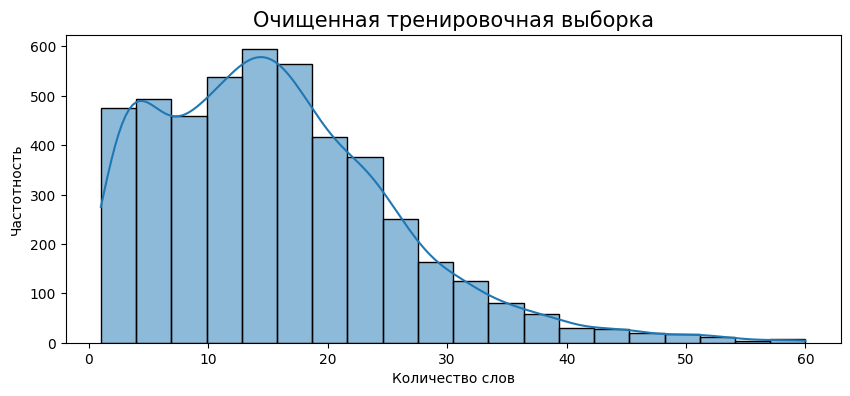

In [20]:
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(
    data=clean_train_df.translation.str.split().map(lambda x: len(x)),
#    x=data,
    bins=20,
    kde=True
)
ax.set(xlabel='Количество слов', ylabel='Частотность')
ax.set_title(
    "Очищенная тренировочная выборка",
    size=15
)
plt.show()

Теперь распределение стало более похоже на тестовую выборку.

In [22]:
clean_train_data = clean_train_df.to_dict(orient="records")
clean_train_data

[{'prompt': 'Translate the following text from English to Spanish\n\n### English:\nBank card details\n\n### Spanish:\n',
  'translation': 'Detalles de tarjetas bancarias'},
 {'prompt': 'Translate the following text from English to Russian\n\n### English:\nBank card details\n\n### Russian:\n',
  'translation': 'Данные банковских карт'},
 {'prompt': 'Translate the following text from Spanish to English\n\n### Spanish:\nDetalles de tarjetas bancarias\n\n### English:\n',
  'translation': 'Bank card details'},
 {'prompt': 'Translate the following text from Spanish to Russian\n\n### Spanish:\nDetalles de tarjetas bancarias\n\n### Russian:\n',
  'translation': 'Данные банковских карт'},
 {'prompt': 'Translate the following text from Russian to English\n\n### Russian:\nДанные банковских карт\n\n### English:\n',
  'translation': 'Bank card details'},
 {'prompt': 'Translate the following text from Russian to Spanish\n\n### Russian:\nДанные банковских карт\n\n### Spanish:\n',
  'translation': 'De

In [23]:
with open("data_cs/clean_train.pkl", "wb") as file3:
    pickle.dump(clean_train_data, file3)